# VA Project

In [1]:
#disable some annoying warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import altair as alt

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn import decomposition
from sklearn.manifold import TSNE

# Load Data

For the project I have chosen to use https://www.gapminder.org/data/. There are many various datasets on the website.
I have picked three: children_per_woman_total_fertility, gdppercapita_us_inflation_adjusted, life_expectancy_years, to see if there is any correlation in the data.
My hypothesis is that in recent years countries all over the world tend to have higher life expectancy, lower fertility and that they are correlated to GDP. The data and its visualisation should either prove or disprove this hypothesis.
The first thing I have noticed after downloading the datasets, was that the fertility and life expectancy datasets had data for years 1800 to 2100, while the gdp dataset fo years from 1960 to 2019. This is why I decided to concentrate on years between 1960 and 2019 in all three datasets.
Another issue was that the gdp was missing some of the countries that were in the other two datasets. I have to delete the extra countries from the fertility and life expectancy datasets. I have also deleted the countries with the population less than 7.5 mill people to make the vizualisations clearer and not too overcrowded. This had to be done manually because the datasets were missing the population data.
It is important to point out that the approach would not have changed if all the countries that ar epresented in all three datasets have been preserved.
I also had to add manually th information about the continents as it was missing from the datasets as well.
The life expectancy and fertility datasets were not missing any values. But some outliers show that perhaps some of the values actually had been missing and had been filled in with means.
In the gdp dataset some countries had missing values in the beginner or end years. To avoid outlier as was the case with the life expectancy and fertility datasets, I have replaced the missing with the first or last present value, depending on whether the values were missing in the earlier or later years.

In [2]:
fertility_ds = pd.read_csv('data/children_per_woman_total_fertility.csv', index_col='country')
fertility_ds.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86,1.86
Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,6.94,...,2.54,2.52,2.50,2.48,2.47,2.45,2.43,2.42,2.40,2.40
Argentina,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,6.80,...,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82,1.82
Australia,6.50,6.48,6.46,6.44,6.42,6.40,6.38,6.36,6.34,6.32,...,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.81,1.81
Austria,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,5.10,...,1.79,1.79,1.79,1.79,1.79,1.79,1.79,1.79,1.79,1.79


In [3]:
gdp_ds = pd.read_csv('data/gdppercapita_us_inflation_adjusted.csv',index_col='country')
gdp_ds.head()

,continent,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Algeria,Africa,2480,2090,1640,2150,2210,2290,2120,2260,2430,...,4480,4520,4590,4620,4700,4780,4830,4790,4760,4710
Angola,Africa,3180,3180,3180,3180,3180,3180,3180,3180,3180,...,3590,3580,3750,3800,3840,3750,3530,3410,3230,3100
Argentina,South America,5640,5850,5710,5320,5770,6290,6150,6260,6460,...,10400,10900,10600,10800,10400,10600,10200,10400,10000,9730
Australia,Australia/Oceania,19400,19500,19200,20100,21000,21900,21900,23000,23700,...,52000,52600,53700,54100,54700,55100,55700,56100,56900,57100
Austria,Europe,13000,13700,14000,14400,15200,15600,16400,16800,17400,...,46900,48100,48200,47900,47800,47800,48300,49100,50100,50700


In [4]:
life_expectancy_ds = pd.read_csv('data/life_expectancy_years.csv', index_col='country')
life_expectancy_ds.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9
Argentina,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,33.2,...,86.7,86.8,86.9,87.0,87.1,87.2,87.3,87.4,87.5,87.6
Australia,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,34.0,...,91.0,91.2,91.3,91.4,91.5,91.6,91.7,91.8,91.9,92.0
Austria,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,90.8,90.9,91.0,91.1,91.2,91.3,91.5,91.6,91.7,91.8


To make the data more observable, I have chosen every fifth year in the period between 1960 and 2019, since 2019 is the last year in the gdp dataset. Th exact numbers every year are not important, but a change every 5 years can show a general trend in the development of GDP, life expectancy and fertility.
Forming new datasets with the chosen years. Grouping of 5 or 10 years could hide any drops and straighten the curves, due to this I decided not to group the data.

In [5]:
years = ["1960","1965","1970","1975","1980","1985","1990","1995","2000","2005","2010","2015","2019"]
fertility = fertility_ds[years]
gdp_2019 = gdp_ds[years]
gdp = gdp_2019.rename(columns={'2019': '2020'})#renaming 2019 to 2020 to set the step of 5 in widgets later.
life_expectancy = life_expectancy_ds[years]

In [6]:
#Creating a column with continents
continents=gdp_ds[["continent"]]
cont=pd.concat([continents]*13)
sort_cont=cont.sort_values('country')

In [7]:
#Forming one new dataset for all the data, where the columns are: country, years, gdp, fertility, life_expectancy, continent
gdp_stack = gdp.stack()
fertility_stack = fertility.stack()
life_expectancy_stack = life_expectancy.stack()

final_ds = pd.DataFrame(gdp_stack).reset_index()
final_ds.columns = ['country','year','gdp']

fertility_final = pd.DataFrame(fertility_stack).reset_index()
fertility_final.columns = ['country', 'year','fertility']

life_expectancy_final = pd.DataFrame(life_expectancy_stack).reset_index()
life_expectancy_final.columns = ['country', 'year','life_expectancy']

final_ds['fertility'] = fertility_final['fertility'].values
final_ds['life_expectancy'] = life_expectancy_final['life_expectancy'].values
final_ds['continent'] = sort_cont['continent'].values
final_ds[['gdp']] = final_ds[['gdp']].apply(pd.to_numeric)
final_ds['year'] = final_ds['year'].astype(int)

print(final_ds)

       country  year   gdp  fertility  life_expectancy continent
0      Algeria  1960  2480       7.52             52.5    Africa
1      Algeria  1965  2290       7.68             55.4    Africa
2      Algeria  1970  2710       7.64             58.1    Africa
3      Algeria  1975  3120       7.43             60.1    Africa
4      Algeria  1980  3640       6.79             62.8    Africa
...        ...   ...   ...        ...              ...       ...
1256  Zimbabwe  2000  1450       4.06             46.6    Africa
1257  Zimbabwe  2005   971       3.99             45.1    Africa
1258  Zimbabwe  2010   948       4.03             49.7    Africa
1259  Zimbabwe  2015  1230       3.84             59.6    Africa
1260  Zimbabwe  2020  1180       3.53             62.0    Africa

[1261 rows x 6 columns]


In [8]:
#Creating lists with contries and continents
countries = gdp_ds.index
country_list =[]
for i in countries:
    if i not in country_list:
        country_list.append(i)

continent_list = []
for i in final_ds['continent']:
    if i not in continent_list:
        continent_list.append(i)

# Show Data

First we can look at the mean values.
The mean of grouped data by year shows that the overall world trend is a growth of GDP and of life expectancy, a decrease in the fertility.

In [9]:
final_ds.groupby('year').mean()

,gdp,fertility,life_expectancy
year,,,
1960,5578.154639,5.554639,54.062887
1965,6107.350515,5.538969,56.544330
1970,6854.567010,5.364742,58.692784
1975,7573.711340,5.080825,60.580412
1980,8349.989691,4.809175,62.607216
1985,8080.175258,4.539175,63.890722
1990,8750.350515,4.198144,65.108247
1995,8958.257732,3.806289,65.439175
2000,10034.123711,3.491134,66.530928


If we look at the means of the data grouped by continents, we can see that countries in Europe have the highest GDP, people in Europe live the longest and have fewer children. In Africa is the situation completely different: low GDP, more children per woman and lower life expectancy.v

In [10]:
final_ds.groupby('continent').mean()

,year,gdp,fertility,life_expectancy
continent,,,,
Africa,1990.0,1181.404467,6.085012,54.696774
Asia,1990.0,7799.769231,4.114780,65.538462
Australia/Oceania,1990.0,19623.076923,3.586154,65.307692
Europe,1990.0,22003.769231,1.853115,74.240769
North America,1990.0,11436.798077,3.744808,68.075000
South America,1990.0,6373.750000,3.718846,68.631731


We can also notice another tendency when we look at the mean values per country: contries with lower the GDP have lower life expectancy and higher fertility per woman.

In [11]:
final_ds.groupby('country').mean()

,year,gdp,fertility,life_expectancy
country,,,,
Algeria,1990.0,3601.538462,4.954615,67.923077
Angola,1990.0,2995.384615,6.914615,51.253846
Argentina,1990.0,7914.615385,2.820769,71.392308
Australia,1990.0,37546.153846,2.166154,76.823077
Austria,1990.0,33169.230769,1.750769,75.584615
...,...,...,...,...
Venezuela,1990.0,13292.307692,3.853077,70.584615
Vietnam,1990.0,780.307692,3.887692,66.561538
Yemen,1990.0,1016.769231,6.862308,55.715385


The visualisation below provides a plot for one or all features for a selected country.
Most countries show a steady growth in GDP and life_expectancy and the decrease in the fertility.
It is worth pointing out that the GDP in some of countries, eg. ex-USSR countries in the 90-s, drops significantly during some of the years. 
This can be explained by different political and economical events. This rapid drop in the GDP may coincide with the drop in fertility and life_expectancy.
The flat lines indicate those years where the original data was missing and filed in artificially.
Interesting that the curves for fertility and life expectancy are mostly smooth and are constantly decreasing or increasing respectively,while the GDP line might have sudden drops and rises. This perhaps can be explained by the fact that if the the drop has not been very significant or long, the life of the population is not affected significantly. E.g. see Angola.

In [12]:
@interact(country=country_list,category=['gdp','fertility','life_expectancy','all'])
def printing(country,category):
    gapcountry = final_ds[final_ds.country == country]
    if category=='all':
        plt.figure(figsize=(20, 20))     
        ax1 = plt.subplot(311)
        plt.plot(gapcountry['year'],gapcountry['gdp'])
        plt.setp(ax1.get_xticklabels(),fontsize=8)
        ax1.set_ylabel('GDP') 

        # share x only
        ax2 = plt.subplot(312, sharex=ax1)
        plt.plot(gapcountry['year'],gapcountry['fertility'])
        # make these tick labels invisible
        plt.setp(ax2.get_xticklabels(), fontsize=8)
        ax2.set_ylabel('Fertlity') 
    
        ax3 = plt.subplot(313, sharex=ax1)
        plt.plot(gapcountry['year'],gapcountry['life_expectancy'])
        plt.setp(ax1.get_xticklabels(), fontsize=8)
        ax3.set_ylabel('Life Expectancy') 
        plt.show()
    else:   
        plt.plot(gapcountry['year'],gapcountry[category])
        plt.title(country)
        plt.xlabel('Years')
        plt.ylabel(category)

interactive(children=(Dropdown(description='country', options=('Algeria', 'Angola', 'Argentina', 'Australia', …

The histogram shows how the feature values are distributed.
The visualisation below allows to choose if a specific year should be chosen or all years.
If we choose specific years, we can see that with years there are less and less countries with low GDP - but more countries with slightly higher GDP. With the fertility, fewer countries have 5-7 kids per women, but more 1-2.
And in year 2019, compared to 1960, no countries have 8-9 children per woman. If we look at the life expectancy, the distribution gets more and more left skewed,.i.e. there are more and more countries where people live longer.
If we look at the whole dataset, regardless of years, we can see that from 1960 to 2019 the majority of countries had low GDP, in most countries women had 1-2 or 6-7 children and most people lived 70 years.

In [13]:
slider_year = widgets.IntSlider(min=final_ds.year.min(), max=final_ds.year.max(),step=5,description="Year")
check_widget = widgets.Checkbox(False,description="Whole Dataset")

@interact(year=slider_year,whole=check_widget)
def histogram(year,whole):
    if whole is False:
        gapcountry = final_ds[final_ds.year == year]
        plt.figure(figsize=(30,10))
        plt.subplot(131)
        ax1= plt.hist(gapcountry['gdp'],range=(final_ds['gdp'].min(), final_ds['gdp'].max()))
        plt.xlabel('GDP') 

        plt.subplot(132)
        plt.hist(gapcountry['fertility'],range=(final_ds['fertility'].min(), final_ds['fertility'].max()))
        plt.xlabel('Fertility') 

        plt.subplot(133)
        plt.hist(gapcountry['life_expectancy'],range=(final_ds['life_expectancy'].min(), final_ds['life_expectancy'].max()))
        plt.xlabel('Life Expectancy') 
    else:
        plt.figure(figsize=(30,10))
        plt.subplot(131)
        ax1= plt.hist(final_ds['gdp'],range=(final_ds['gdp'].min(), final_ds['gdp'].max()))
        plt.xlabel('GDP') 

        plt.subplot(132)
        plt.hist(final_ds['fertility'],range=(final_ds['fertility'].min(), final_ds['fertility'].max()))
        plt.xlabel('Fertility') 

        plt.subplot(133)
        plt.hist(final_ds['life_expectancy'],range=(final_ds['life_expectancy'].min(), final_ds['life_expectancy'].max()))
        plt.xlabel('Life Expectancy')


interactive(children=(IntSlider(value=1960, description='Year', max=2020, min=1960, step=5), Checkbox(value=Fa…

The boxplots allow to see the mean, quartiles and outliers on each of the continents.
The visualisation below allows again to choose a specific year or all years.
With the help of the boxplots we can see, eg. in year 2019 that in Asia and North America, the GDP is more widely distributed than on other continents. Asia and Africa have also more outliers with higher GDP than other continents. This means that on these continents most countries are poor, but there are some exceptions. But for example in Europe most countries are around the same level.
If we look at the fertility in 2019, we can see that on all continents but Africa most women have 3 children or fewer.
While in Africa, the range is wider and the mean is higher.
If we look at life expectancy, Africa again has some outliers with longer life expectancy, overall the life expectancy on this continent is lower than anywhere else.
If we look at all the years, it is easily noticeable than in years between 1960 and 2019 Europe was the most homogenuous continent, while Australia is the most heterogeneous one. Europe seems to be doing the best in terms of all three features in years 1960 to 2019, while Africa the worst, if we talk about continents as a whole.

In [14]:
slider_year = widgets.IntSlider(min=final_ds.year.min(), max=final_ds.year.max(),step=5,description="Year")
check_widget = widgets.Checkbox(False,description="Whole Dataset")

@interact(year=slider_year,whole=check_widget)
def histogram(year,whole):
    if whole is False:
        gapcountry = final_ds[final_ds.year == year]
        plt.figure(figsize=(40,20))
        
        plt.subplot(131)
        ax1 = sns.boxplot(x='continent',y='gdp',data=gapcountry)
        ax1.set(yscale="log")

        plt.subplot(132)
        sns.boxplot(x='continent',y='fertility',data=gapcountry)

        plt.subplot(133)
        sns.boxplot(x='continent',y='life_expectancy',data=gapcountry) 
    else:
        plt.figure(figsize=(40,20))
        
        plt.subplot(131)
        ax1 = sns.boxplot(x='continent',y='gdp',data=final_ds)
        ax1.set(yscale="log")

        plt.subplot(132)
        sns.boxplot(x='continent',y='fertility',data=final_ds)

        plt.subplot(133)
        sns.boxplot(x='continent',y='life_expectancy',data=final_ds)

interactive(children=(IntSlider(value=1960, description='Year', max=2020, min=1960, step=5), Checkbox(value=Fa…

Next, we can also have a look at the top countries, choosing a feature, a year or a whole data set.
If it is a whole dataset, the mean can be used and the data can be grouped by country or continent.
We can e.g. see that in year 2019, Switzerland had the highest GDP, while Burundy had the smallest one.
The highest fertility in 2020 was in Niger, the lowest - in Portugal.
And in 2020 people lived the longest in Japan and the shortest in Papua New Guinea.
If we have a look at the highest GDP overall in years between 1960 and 2019, we can notice that the United Arab Emirates had the highest GDP in 1980 overall. 
The UAE also have the mean highest GDP over all countries in years 1960 to 2019.
Till year 2020 the UAE was always on top in terms of GDP. And, for instance, starting from year 1985 people live the longest in Japan. And almost always the top 5 countries with the highest fertility are in Africa. And with the lowest fertility in - Europe.

In [15]:
toggle = widgets.RadioButtons(options=['Largest','Smallest'], description="Category")
toggle2 = widgets.RadioButtons(options=['gdp','fertility','life_expectancy','all'], description="Feature")
slider_widget = widgets.BoundedFloatText(5,min=1,max=30, description='Choose n')
slider_year = widgets.IntSlider(min=final_ds.year.min(), max=final_ds.year.max(),step=5,description="Year")
check_widget = widgets.Checkbox(False,description="Or Whole Dataset")
toggle3 = widgets.RadioButtons(options=['country','continent'], description="Grouped by...")
mean = widgets.Checkbox(False,description="Mean or not")

@interact(category=toggle,feature=toggle2,n=slider_widget,year=slider_year,whole_ds=check_widget,mean=mean,grouped_by=toggle3)
def largest_smallest2(category,feature,n,year,whole_ds,mean,grouped_by):
    n = int(n)
    feature_list = ['gdp','fertility','life_expectancy']
    if whole_ds is True and mean is True and grouped_by == 'country':
        grouped = final_ds.groupby('country').mean()
    elif whole_ds is True and mean is True and grouped_by == 'continent':
        grouped = final_ds.groupby('continent').mean()
    elif whole_ds is True and mean is False:
        grouped = final_ds
    
    elif whole_ds is False:
        grouped = final_ds[final_ds.year == year]
            
    if category == 'Largest':
        if feature == 'all':

            for i in feature_list:
                print(i)
                print(grouped.nlargest(n,i))
                print('\n')
        else:

            print(grouped.nlargest(n,feature))
    elif category == 'Smallest':
        if feature == 'all':

            for i in feature_list:
                print(i)
                print(grouped.nsmallest(n,i))
                print('\n')
        else:

            print(grouped.nsmallest(n,feature))

interactive(children=(RadioButtons(description='Category', options=('Largest', 'Smallest'), value='Largest'), …

Next let's have a look at the interactive visualisation, that brings together GDP, life expectancy and fertility.
Regardless of the year, it is easily visible, that African countries are grouped in the left bottom conner and their cicles are rather big. This indicated that African countries have lower GDP and life expectancy, but women there have more children.
In the upper right corner we can see many European and some North American countries and their cicles are rather small.
Thus there countries are the opposite to the African ones. Between these two clusters we can see a mix of the rest of the countries. If we move the slider for the years we can notice the tendency that all the countries are moving to the right top conner and the cicles are becoming smaller.

In [16]:
@interact(year=(final_ds.year.min(), final_ds.year.max(),5))
def interactive(year):
    gapyear = final_ds[final_ds.year == year]
    vis = alt.Chart(gapyear).mark_circle().encode(
        x=alt.X('gdp',  scale=alt.Scale(type='log')),
        y=alt.Y('life_expectancy', scale=alt.Scale(zero=False)),
        color='continent',
        size='fertility',
        tooltip='country'
    )
    return vis.interactive()

interactive(children=(IntSlider(value=1990, description='year', max=2020, min=1960, step=5), Output()), _dom_c…

The correlation matrix proves what could be seen in previous visualisations.
The strongest correlation is seen between fertlity and life expectancy. The longer people live - the fewer children they have. This can be explain by the fact that they are not afraid for their lifes and try to enjoy themselves, and not to have kids.
There is also some negative correlation between fertility and GDP and fertility and year.
In rich countries people tend to have fewer children as they are not afraid for their future. And with the availability of contraception, feminism and due to other reasons, women tend to have now fewer children than earlier.
There is also some positive correlation between GDP and life expectancy, and life expectancy and year. 
Rich countries have better health systems, more stable economy, no conflicts, what allows their citizens live longer. Also it seems that now people tend to live slightly longer than before.
Interesting that the correlation matrix shows no correlation between the year and the GDP, though the table with the means shows that the tendency for GDP was to go up gradually. No correlation can be explained by the fact that many countries actually had crises in years from 1960 to 2019 and the growth in GDP was not always steady, but with sudden drops and rises.

/Users/daryashitova/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:1201: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


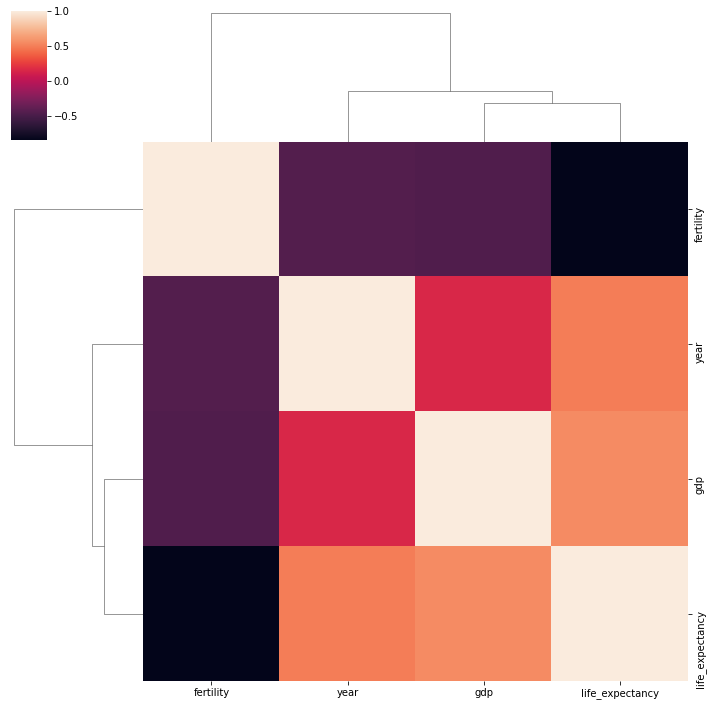

In [17]:
corrmat = final_ds.corr()
sns.clustermap(corrmat, square=True)

PCA and t-sne allow to reduce the number of data from 3 (if we choose a specific year) or 4 (if we choose the whole dataset) to 2 and then the resulted clusters can be plotted.
The user can choose between t-sne (and its perplexity) and PCA, and also choose if the whole dataset or just a specific year should be used.
T-sne seems to be showing better results in terms of clustering, but still there are no clear separations between all continents. It can be explained by the fact that if e.g. contries in Africa and Europe are mostly completely different in terms of GDP, life expectancy and fertility, there are still some exceptions.
Contries on the rest of the continents are very different in terms of features and there is no strict difference between them. For instnace in Australia/Oceania, there are not many countries and some of them are rather economically stable, as e.g. Australia or new Zealand, but some are rather poor, e.g. Indonesia.

In [18]:
toggle = widgets.RadioButtons(options=['t-sne','PCA'], description="Dimension Reduction")
slider_widget = widgets.BoundedFloatText(30,min=10,max=100, description='If t-sne, choose perplexity')
slider_year = widgets.IntSlider(min=final_ds.year.min(), max=final_ds.year.max(),step=5,description="Year")
check_widget = widgets.Checkbox(False,description="Whole Dataset")


@interact(category=toggle,slider=slider_widget,year=slider_year,check=check_widget)
def react(category,slider,year,check):
    new_ds = final_ds.replace({"Africa": 0, 'Asia': 1, 'Australia/Oceania': 2, 'Europe':3, 'North America':4,'South America': 5})
    if check is True:
        ml_df_x=final_ds[['year','gdp','fertility','life_expectancy']]
        if category == 't-sne':
            tsne = TSNE(n_components=2,perplexity=slider)
            data_reduced = tsne.fit_transform(ml_df_x)
        if category == 'PCA':
            pca = decomposition.PCA(n_components=2)
            data_reduced = pca.fit(ml_df_x).transform(ml_df_x)
        finalDf = pd.DataFrame(data = data_reduced, columns = ['principal component 1', 'principal component 2'])
        finalDf['target'] = final_ds['continent'].values
    if check is False:
        gap_year = final_ds[final_ds.year == year]
        ml_df_x=gap_year[['gdp','fertility','life_expectancy']]
        if category == 't-sne':
            tsne = TSNE(n_components=2,perplexity=slider)
            data_reduced = tsne.fit_transform(ml_df_x)
        if category == 'PCA':
            pca = decomposition.PCA(n_components=2)
            data_reduced = pca.fit(ml_df_x).transform(ml_df_x)
        finalDf = pd.DataFrame(data = data_reduced, columns = ['principal component 1', 'principal component 2'])
        finalDf['target'] = gap_year['continent'].values
            
    brush = alt.selection_interval()  # selection of type "interval"
    
    chart = alt.Chart(finalDf).mark_point().encode(
        x='principal component 1',
        y='principal component 2',
        color=alt.condition(brush, 'target:N', alt.value('lightgray')) # unselected become lightgrey if condition(brushed)=false
    ).add_selection(
        brush  # bind this brush to our chart
    ).properties(
        width=800,
        height=400
    )
    
    bars = alt.Chart(finalDf).mark_bar().encode(
        y='target:N',
        x='count(target):Q',
        color='target:N'
    ).transform_filter(
        brush
    )
    return(chart&bars)



interactive(children=(RadioButtons(description='Dimension Reduction', options=('t-sne', 'PCA'), value='t-sne')…

The visualisation of the data proved the hypothesis, that the world tends to have higher life expectancy, lower fertility and that this is correlated to GDP. Countries with higher life expectancy tend to have lower fertility.
This can be explained by a fear of overpopulation and a corresponding social policies of the government.
Countries with higher GDP also tend to have lower fertility. This can be explained by feminism, availability contraception, sex education etc. However, if due to some reason the GDP suddenly drops,
the fertility and life expectancy drop sometimes as well, but more often this does not happen, especially if the drop is not long.
Countries with higher GDP also are more common to have high life expectancy due to better medical care and fewer political and war conflicts.
It was also interesting to see that the countries in Europe all rather homogeneous in all the features, while countries in Australia/Oceania are widely spread in terms of the values.
In Africa and Asia most of the countries are rather poor, but there are some richer outliers.